## Workshop - ML Classification

In this workshop we will 

* obtain the null model accuracy
* obtain a Gaussian naive Bayes accuracy
* cross-validate a KNN classifier and obtain the accuracy

Run this code. **Notice the alternative standardization technique.**

In [10]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

import matplotlib.pyplot as plt

In [11]:
df = pd.read_pickle('C:/Users/hubst/Econ490_group/class_data.pkl')

In [12]:
df_prepped = df.drop(columns = ['year', "GeoName"]).join([
    pd.get_dummies(df.year, drop_first = False)    
])

In [13]:
y = df_prepped['urate_bin'].astype('category')
x = df_prepped.drop(columns = 'urate_bin')

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 2/3, random_state = 490)

x_train_std = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),
                           columns = x_train.columns,
                           index = x_train.index)

x_test_std = pd.DataFrame(StandardScaler().fit(x_test).transform(x_test),
                          columns = x_test.columns, 
                          index = x_test.index)

************
# Null Model
Obtain and print the accuracy for the null model.

In [14]:
y_train.value_counts()

higher     14653
lower      12665
similar     6100
Name: urate_bin, dtype: int64

In [15]:
acc_null = np.mean(y_test == 'higher')
acc_null

0.4348554671135316

***
# Gaussian Naive Bayes
Obtain and print the GNB test accuracy.

In [16]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
acc_gnb = gnb.score(x_test, y_test)
acc_gnb

0.49081333413130646

Obtain and print the percent improvement in test accuracy from the null model.

In [17]:
100*(acc_gnb - acc_null)/acc_null

12.86815304156344

***
# KNN
Complete the following for loop.

*Hint: Lecture 11 Regression-Based Classification - Alternative Thresholds*.

In [18]:
kf = KFold(n_splits = 5, random_state = 490, shuffle = True)
# I am helping you out by identifying approximately where the optimal solution is
# in general, you should I would start with
# [3, 5, 7, 10, 15, 20, 25]
# and adjust accordingly
# There is no reason to suspect a smaller or higher value is best a priori
k_nbrs = [20, 30, 40]
accuracy = {}


for k in tqdm(k_nbrs):
    acc = []
    for trn, tst in kf.split(x_train_std):
        yhat = KNeighborsClassifier(n_neighbors = k
                                   ).fit(x_train_std.iloc[trn], y_train.iloc[trn]
                                        ).predict(x_train_std.iloc[tst])        
        acc.append(np.mean(yhat == y_train.iloc[tst]))
    accuracy[k] = np.mean(acc)
    
# accuracy

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:21<00:00, 27.12s/it]


What is the optimal value of $k$ using either `max()` or by producing a scatterplot.

In [19]:
print('max accuracy at k = %s' % max(accuracy, key = accuracy.get))

max accuracy at k = 30


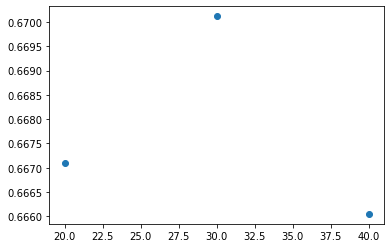

In [20]:
plt.scatter(accuracy.keys(), accuracy.values())
plt.show()

Refit the optimal KNN model on the training data.

In [21]:
best_k = max(accuracy, key = accuracy.get)
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=30)

Obtain and print the test accuracy.

In [13]:
%%time
yhat_knn = knn.predict(x_test_std)
acc_knn = np.mean(yhat_knn == y_test)
# acc_knn

# You can alternatively use:
# knn.score(x_test_std, y_test)

Wall time: 24.4 s


Obtain and print the percent improvement in test accuracy from the null model.

In [14]:
100*(acc_knn - acc_null)/acc_null

54.94087263830365